In [47]:
import pandas as pd
import random
import numpy as np
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.tree import export_text
import matplotlib.pyplot as plt

In [68]:
data = {
    'X1': [random.random() for _ in range(10)],
    'X2': [random.random() for _ in range(10)],
    'y': [random.randint(0, 1) for _ in range(10)]
}

In [69]:
df = pd.DataFrame(data)

In [70]:
df

,X1,X2,y
0,0.333524,0.813967,1
1,0.603946,0.141812,0
2,0.310340,0.339415,1
3,0.116721,0.468795,0
4,0.578558,0.548958,1
5,0.709647,0.209685,1
6,0.526424,0.734044,0
7,0.927783,0.569289,1
8,0.301758,0.614637,0
9,0.710276,0.566021,1


In [71]:
X=df.drop(columns='y')

In [72]:
X

,X1,X2
0,0.333524,0.813967
1,0.603946,0.141812
2,0.310340,0.339415
3,0.116721,0.468795
4,0.578558,0.548958
5,0.709647,0.209685
6,0.526424,0.734044
7,0.927783,0.569289
8,0.301758,0.614637
9,0.710276,0.566021


In [73]:
y=df['y']

In [74]:
y

0    1
1    0
2    1
3    0
4    1
5    1
6    0
7    1
8    0
9    1
Name: y, dtype: int64

In [91]:
df_new=df.copy()

In [92]:
df_new

,X1,X2,y
0,0.333524,0.813967,1
1,0.603946,0.141812,0
2,0.310340,0.339415,1
3,0.116721,0.468795,0
4,0.578558,0.548958,1
5,0.709647,0.209685,1
6,0.526424,0.734044,0
7,0.927783,0.569289,1
8,0.301758,0.614637,0
9,0.710276,0.566021,1


In [93]:
df_new['log_odds']=sum(df['y'])/(df.shape[0]-sum(df['y']))

In [94]:
df_new

,X1,X2,y,log_odds
0,0.333524,0.813967,1,1.5
1,0.603946,0.141812,0,1.5
2,0.310340,0.339415,1,1.5
3,0.116721,0.468795,0,1.5
4,0.578558,0.548958,1,1.5
5,0.709647,0.209685,1,1.5
6,0.526424,0.734044,0,1.5
7,0.927783,0.569289,1,1.5
8,0.301758,0.614637,0,1.5
9,0.710276,0.566021,1,1.5


In [95]:
df_new['prob']=(np.exp(df_new['log_odds'])) / (1 + np.exp(df_new['log_odds']))

In [96]:
df_new['residual']=df_new['y']-df_new['prob']

In [97]:
df_new

,X1,X2,y,log_odds,prob,residual
0,0.333524,0.813967,1,1.5,0.817574,0.182426
1,0.603946,0.141812,0,1.5,0.817574,-0.817574
2,0.310340,0.339415,1,1.5,0.817574,0.182426
3,0.116721,0.468795,0,1.5,0.817574,-0.817574
4,0.578558,0.548958,1,1.5,0.817574,0.182426
5,0.709647,0.209685,1,1.5,0.817574,0.182426
6,0.526424,0.734044,0,1.5,0.817574,-0.817574
7,0.927783,0.569289,1,1.5,0.817574,0.182426
8,0.301758,0.614637,0,1.5,0.817574,-0.817574
9,0.710276,0.566021,1,1.5,0.817574,0.182426


In [134]:
df_1 = df_new.copy()

In [136]:
model=DecisionTreeRegressor(max_leaf_nodes=3)

In [137]:
model.fit(X,df_1['residual'])

DecisionTreeRegressor(max_leaf_nodes=3)

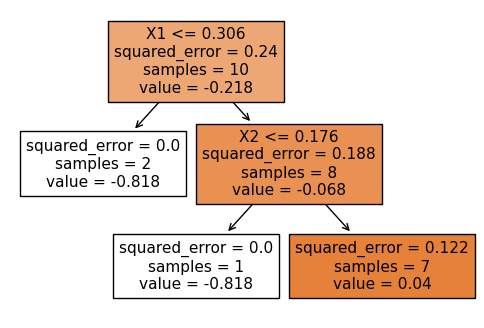

In [138]:
plt.figure(figsize=(6, 4))  # You can adjust the figure size as needed
plot_tree(model, filled=True, feature_names=x.columns)
plt.show()

In [102]:
leaf_indeces=model.apply(X)
print(leaf_indeces)
unique_leaves=np.unique(leaf_indeces)
n_leaf=len(unique_leaves)

[4 3 4 1 4 4 4 4 1 4]


In [104]:
unique_leaves

array([1, 3, 4], dtype=int64)

In [108]:
probabilities = [[]]
residuals = [[]]

In [131]:
gamma_value = [[], []]

In [111]:
probabilities[0] = df_1['prob']
residuals[0] = y - probabilities[0]

In [129]:
gamma_value = [[] for _ in range(n_leaf)]
for idx in [0,1]:
    if not gamma_value[idx]:
        gamma_value[idx] = []

In [130]:
gamma_value

[[], []]

In [133]:
gamma_value[0][0].append(1)

IndexError: list index out of range

In [132]:
for ileaf in range(n_leaf):        
    leaf_index=unique_leaves[ileaf]
    n_leaf=len(leaf_indeces[leaf_indeces==leaf_index])
    previous_probability = probabilities[0][leaf_indeces==leaf_index]
    denominator = np.sum(previous_probability * (1-previous_probability))
    igamma = model.tree_.value[ileaf+1][0][0] * n_leaf / denominator
    gamma_value[0][ileaf].append(igamma)
    print(f'for leaf {leaf_index}, we have {n_leaf} related samples. and gamma is {igamma}')

IndexError: list index out of range

In [90]:
df_new

,X1,X2,y,log_odds,prob,residual,pred_resi
0,0.333524,0.813967,1,1.5,0.817574,0.182426,4
1,0.603946,0.141812,0,1.5,0.817574,-0.817574,3
2,0.310340,0.339415,1,1.5,0.817574,0.182426,4
3,0.116721,0.468795,0,1.5,0.817574,-0.817574,1
4,0.578558,0.548958,1,1.5,0.817574,0.182426,4
5,0.709647,0.209685,1,1.5,0.817574,0.182426,4
6,0.526424,0.734044,0,1.5,0.817574,-0.817574,4
7,0.927783,0.569289,1,1.5,0.817574,0.182426,4
8,0.301758,0.614637,0,1.5,0.817574,-0.817574,1
9,0.710276,0.566021,1,1.5,0.817574,0.182426,4


In [36]:
tree_text = export_text(model, feature_names=x.columns)

In [37]:
tree_text

'|--- X2 <= 0.32\n|   |--- value: [-0.65]\n|--- X2 >  0.32\n|   |--- X2 <= 0.55\n|   |   |--- value: [0.35]\n|   |--- X2 >  0.55\n|   |   |--- X1 <= 0.71\n|   |   |   |--- value: [-0.40]\n|   |   |--- X1 >  0.71\n|   |   |   |--- value: [0.35]\n'

In [38]:
print(tree_text)

|--- X2 <= 0.32
|   |--- value: [-0.65]
|--- X2 >  0.32
|   |--- X2 <= 0.55
|   |   |--- value: [0.35]
|   |--- X2 >  0.55
|   |   |--- X1 <= 0.71
|   |   |   |--- value: [-0.40]
|   |   |--- X1 >  0.71
|   |   |   |--- value: [0.35]



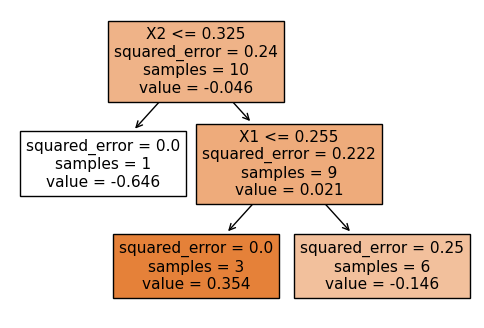

In [56]:
plt.figure(figsize=(6, 4))  # You can adjust the figure size as needed
plot_tree(model, filled=True, feature_names=x.columns)
plt.show()